#  Gaussian Noise Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@46956d8a

This filter adds noise to an image based on a Gaussian kernel (i.e. not uniform)

The `Op` is called as follows:

In [2]:
ij.op().help('addNoise')

Available operations:
	(RealType out?) =
	net.imagej.ops.filter.addNoise.AddNoiseRealTypeCFI(
		RealType out?,
		RealType in,
		double rangeMin,
		double rangeMax,
		double rangeStdDev,
		long seed?)
	(RealType out) =
	net.imagej.ops.filter.addNoise.AddNoiseRealType(
		RealType out,
		RealType in,
		double rangeMin,
		double rangeMax,
		double rangeStdDev,
		long seed?)

Here we have an image of tree rings ([Source](http://imagej.net/images/Dot_Blot.jpg)).

[INFO] Populating metadata
[INFO] Populating metadata


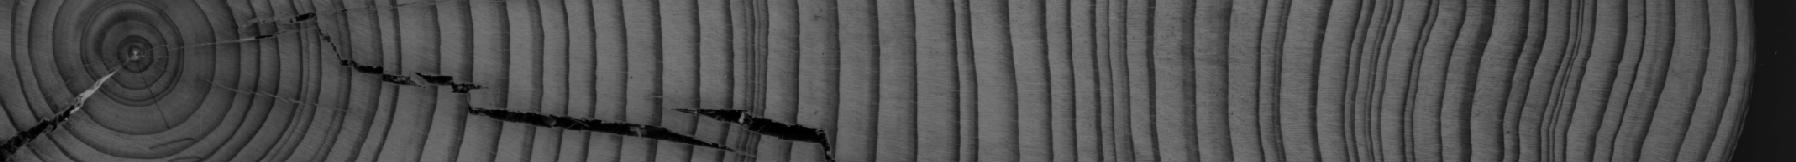

In [3]:
input = ij.scifio().datasetIO().open("https://imagej.net/images/Tree_Rings.jpg")
ij.notebook().display(input)                                     

`addNoise` works on `RealType` `Object`s, so if we want to apply this `Op` to an image we have to create an instance of this `Op` and use a `Map` to apply it to our whole `Img`.

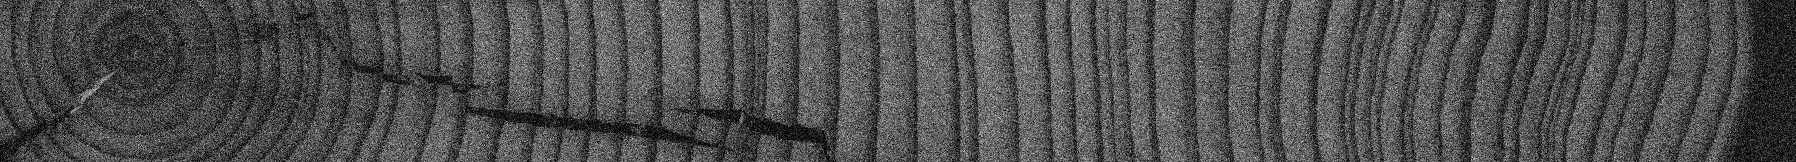

In [4]:
import net.imagej.ops.map.MapIterableToIterable
import net.imagej.ops.Ops
import net.imagej.ops.special.computer.Computers

//temporary type to pass through to the Op instance so that the Op knows what Type it is working on
tempType = input.firstElement()

//the minimum and maximum values allowed in the output - all values in the output 
//will be clamped to this value if below it in the input, so be careful
rangeMin = input.firstElement().getMinValue()
rangeMax = input.firstElement().getMaxValue()

//the standard deviation for the gaussian kernel
stdDev = 30d

//create the op that is passed through to the Mapper, using the help() op syntax above
noiseOp = Computers.unary(ij.op(), Ops.Filter.AddNoise.class, tempType, tempType, rangeMin, rangeMax, stdDev)

//output image
actualOutput = ij.op().create().img(input)

//run a map op over the image using the noise Op above
ij.op().run(MapIterableToIterable.class, actualOutput, input, noiseOp)

ij.notebook().display(actualOutput)

And there is noise. There are other noise `Op`s available in ImageJ-Ops that use different kernels, such as the [Poisson Noise Op](addPoissonNoise.ipynb), useful for simulating microscope noise.